# **PREDICCIÓN DE PRECIOS DE VUELOS**

#### <strong><font color="green">🎯 Objetivo</font></strong>

El objetivo es desarrollar un modelo predictivo capaz de estimar el precio de un boleto de avión basándonos en diversas características del vuelo. Este problema representa un escenario común en la industria de viajes, donde las aerolíneas y las agencias de viajes buscan ofrecer a los pasajeros tarifas competitivas y precisas.

Se requiere ofrecer a los clientes una herramienta que les permita obtener estimaciones precisas del precio de los boletos de avión para su próximo viaje. Sin embargo, el precio de un boleto de avión puede variar signiﬁcativamente según múltiples factores, como la aerolínea, el destino, la temporada, la clase de servicio y la anticipación de la reserva. Aquí es donde entra en juego el Data Science.

El desafío radica en desarrollar un modelo de Machine Learning que pueda predecir el precio de un boleto de avión en función de estas diversas variables. Esto implica limpiar, explorar y transformar los datos, seleccionar características relevantes, entrenar y aﬁnar modelos predictivos y evaluar su rendimiento de manera precisa.

#### <strong><font color="green">Entorno de ejecución.</font></strong>

Para este proyecto se utilizará el entorno de ejecución de Jupyter Notebook. La versión de python es la 3.12.10 con las siguientes librerías:

- numpy==1.26.4
- pandas==2.2.2
- scipy==1.11.4
- matplotlib==3.9.2
- seaborn==0.13.2
- plotly==5.24.1
- scikit-learn==1.7.1
- xgboost==3.0.0
- lightgbm==4.6.0
- catboost==1.2.8
- scikit-optimize==0.10.2
- imbalanced-learn==0.14.0
- statsmodels==0.14.4

**Se importan librerías y el dataset a utilizar. Se analiza la calidad de los datos.**

In [1]:
# Se importan librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import funciones as f
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#### <strong><font color="green">1.	Descripción del problema de negocio que se desea resolver.</font></strong>

🔍 **Problema:**

Una agencia de viajes en línea quiere predecir el precio de boletos de avión (económicos o ejecutivos) para ofrecer a sus clientes tarifas más precisas y competitivas. El precio del boleto varía según múltiples factores (aerolínea, duración del vuelo, número de escalas, hora de salida/llegada, etc.).

🎯 **Objetivo:**

Desarrollar un modelo de Machine Learning que prediga el precio de un boleto de avión basándose en sus características.

📌 **Variable objetivo:**

    price (numérica): Precio del boleto.

🧰 **Variables independientes (potenciales):**

    airline, dep_time, arr_time, stop, time_taken, from, to, date, num_code, ch_code

📈 **Metodología general:**

- Limpieza de datos.
- Análisis exploratorio (EDA).
- Selección y transformación de características.
- Construcción de una función de preprocesamiento.
- Entrenamiento y ajuste de modelos.
- Evaluación de rendimiento.
- Conclusiones y próximos pasos.

#### <strong><font color="green">2.	Carga de datasets entregados y análisis de calidad de los datos.</font></strong>

In [2]:
# Cargar los datasets
economy_df = pd.read_excel('economy.xlsx')
business_df = pd.read_excel('business.xlsx')

In [3]:
# Agregar columna de clase
economy_df['class'] = 'economy'
business_df['class'] = 'business'

In [4]:
# Ver dataset "economy"
economy_df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953,economy
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953,economy
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956,economy
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955,economy
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955,economy
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,7697,economy
206770,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,7709,economy
206771,2022-03-31,Vistara,UK,826,12:30:00,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05:00,Hyderabad,8640,economy
206772,2022-03-31,Vistara,UK,822,09:45:00,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05:00,Hyderabad,8640,economy


In [5]:
# Ver dataset "business"
business_df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612,business
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612,business
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220,business
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450,business
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690,business
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,2022-03-31,Vistara,UK,822,09:45:00,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50:00,Hyderabad,69265,business
93483,2022-03-31,Vistara,UK,826,12:30:00,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55:00,Hyderabad,77105,business
93484,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,79099,business
93485,2022-03-31,Vistara,UK,828,07:00:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00:00,Hyderabad,81585,business


In [6]:
# Unir datasets
df = pd.concat([economy_df, business_df], ignore_index = True)

# Ver nuevo dataset después de la unión de "economy" y "business"
df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953,economy
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953,economy
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956,economy
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955,economy
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955,economy
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,UK,822,09:45:00,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50:00,Hyderabad,69265,business
300257,2022-03-31,Vistara,UK,826,12:30:00,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55:00,Hyderabad,77105,business
300258,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,79099,business
300259,2022-03-31,Vistara,UK,828,07:00:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00:00,Hyderabad,81585,business


In [7]:
# Análisis de los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300261 non-null  datetime64[ns]
 1   airline     300261 non-null  object        
 2   ch_code     300261 non-null  object        
 3   num_code    300261 non-null  int64         
 4   dep_time    300261 non-null  object        
 5   from        300261 non-null  object        
 6   time_taken  300261 non-null  object        
 7   stop        300261 non-null  object        
 8   arr_time    300261 non-null  object        
 9   to          300261 non-null  object        
 10  price       300261 non-null  object        
 11  class       300261 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 27.5+ MB
None


In [8]:
# Análisis calidad de datos
analysis_result = f.data_quality_analysis(df).set_index('Columna')
print(analysis_result.sort_values('Tipo de dato'))

              Tipo de dato  Valores únicos  Valores nulos  % nulos
Columna                                                           
date        datetime64[ns]              49              0      0.0
num_code             int64            1255              0      0.0
airline             object               8              0      0.0
ch_code             object               8              0      0.0
dep_time            object             251              0      0.0
from                object               6              0      0.0
time_taken          object             483              0      0.0
stop                object              40              0      0.0
arr_time            object             266              0      0.0
to                  object               6              0      0.0
price               object           12165              0      0.0
class               object               2              0      0.0


In [9]:
# Identificar valores únicos en la variable "stop"
valores_unicos_stop = df['stop'].unique()
print(valores_unicos_stop)

['non-stop' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '2+-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t

In [10]:
# Copiar DF para limpiar datos
df_cleaned = df.copy()

In [11]:
# Limpieza de datos

# Limpiar 'price'
df_cleaned["price"] = df_cleaned["price"].replace({",": ""}, regex = True).astype(int)

# Convertir 'time_taken' a minutos
def parse_time_taken_safe(s):
    match = re.match(r"(?:(\d+)h)?\s*(?:(\d+)m)?", s.strip())
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    return hours * 60 + minutes

df_cleaned["duration_mins"] = df_cleaned["time_taken"].apply(parse_time_taken_safe)

# Limpiar columna 'stop'
#df_cleaned["stop"] = df_cleaned["stop"].str.extract(r"(\d\+-?stop|non-stop)")

# Limpiar la columna 'stop' y normalizar los valores
df_cleaned["stop"] = df_cleaned["stop"].str.extract(r"(non-stop|2\+-stop|1-stop)", expand = False)

# Extraer hora de salida y llegada
df_cleaned["dep_hour"] = pd.to_datetime(df_cleaned["dep_time"], format = "%H:%M:%S", errors = "coerce").dt.hour
df_cleaned["arr_hour"] = pd.to_datetime(df_cleaned["arr_time"], format = "%H:%M:%S", errors = "coerce").dt.hour

# Extraer día, mes, día de la semana
df_cleaned["day"] = df_cleaned["date"].dt.day
df_cleaned["month"] = df_cleaned["date"].dt.month
df_cleaned["weekday"] = df_cleaned["date"].dt.dayofweek

In [12]:
# Análisis calidad de datos limpiados
analysis_result2 = f.data_quality_analysis(df_cleaned).set_index('Columna')
print(analysis_result2.sort_values('Tipo de dato'))

                 Tipo de dato  Valores únicos  Valores nulos  % nulos
Columna                                                              
date           datetime64[ns]              49              0      0.0
day                     int32              31              0      0.0
arr_hour                int32              24              0      0.0
dep_hour                int32              24              0      0.0
price                   int32           12165              0      0.0
month                   int32               2              0      0.0
weekday                 int32               7              0      0.0
duration_mins           int64             477              0      0.0
num_code                int64            1255              0      0.0
stop                   object               3              0      0.0
from                   object               6              0      0.0
to                     object               6              0      0.0
dep_time            

In [13]:
# Imprimir dataset con datos limpiados
df_cleaned

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,duration_mins,dep_hour,arr_hour,day,month,weekday
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953,economy,130,18,21,11,2,4
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953,economy,140,6,8,11,2,4
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956,economy,130,4,6,11,2,4
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955,economy,135,10,12,11,2,4
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955,economy,140,8,11,11,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,UK,822,09:45:00,Chennai,10h 05m,1-stop,19:50:00,Hyderabad,69265,business,605,9,19,31,3,3
300257,2022-03-31,Vistara,UK,826,12:30:00,Chennai,10h 25m,1-stop,22:55:00,Hyderabad,77105,business,625,12,22,31,3,3
300258,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop,20:55:00,Hyderabad,79099,business,830,7,20,31,3,3
300259,2022-03-31,Vistara,UK,828,07:00:00,Chennai,10h 00m,1-stop,17:00:00,Hyderabad,81585,business,600,7,17,31,3,3


**Análisis y Limpieza de Datos**

📊 **Datos generales**

- **Total de registros:** 300,261  
- **Columnas:** 12  
- **Valores nulos:** No hay valores nulos en el dataset ✅  

🧼 **Problemas detectados**

🔹 **Columna `price` (tipo object):**
- Los precios deberían ser `float` o `int`, pero están como `object` (probablemente por contener símbolos como ₹, comas, etc.).

🔹 **Columna `stop` con valores sucios:**
- Ejemplo: "1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n..."
- Hay demasiada basura de caracteres de formato (\n, \t) y redundancias.

🔹 **Columna `time_taken` en formato tipo "02h 30m":**
- Deberíamos transformarlo a minutos totales.

🔹 **Columnas de hora (`dep_time`, `arr_time`):**
- Son strings, deben convertirse a `datetime.time` o características útiles como `hour` y `minute`.

🔹 **Columnas categóricas:**
- Todas las columnas categóricas están en formato `object`, se deberán codificar para modelos ML.

✅ **Estrategias de limpieza**

| Columna      | Acción                                                                 |
|--------------|-----------------------------------------------------------------------|
| `price`      | Eliminar caracteres y convertir a `int`                               |
| `stop`       | Limpiar y estandarizar valores (`non-stop`, `1-stop`, `2+-stop`)      |
| `time_taken` | Convertir duración a minutos totales (`int`)                          |
| `dep_time`   | Extraer hora y minuto como nuevas columnas numéricas                  |
| `arr_time`   | Igual que `dep_time`                                                 |
| `from`, `to` | Verificar si aportan valor (son constantes: Delhi -> Mumbai)         |
| `date`       | Extraer `day`, `month`, `weekday`                                    |
| `airline`, `ch_code`, `class` | Convertir a variables categóricas codificadas               |

#### <strong><font color="green">3.	Análisis exploratorio de los datos (análisis univariado y bivariado).</font></strong>

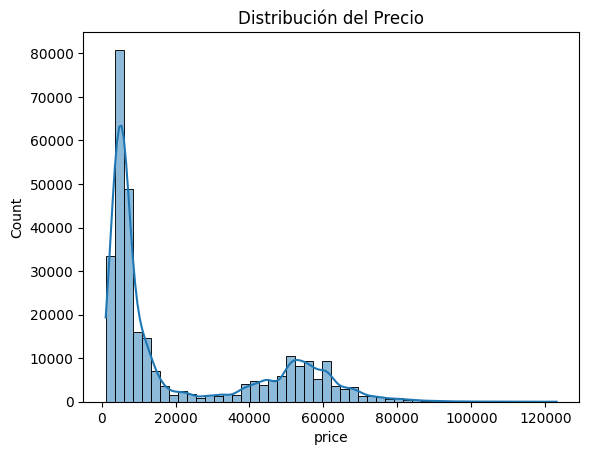

In [14]:
# Histograma de precios
sns.histplot(df_cleaned["price"], bins = 50, kde = True)
plt.title("Distribución del Precio")
plt.show()

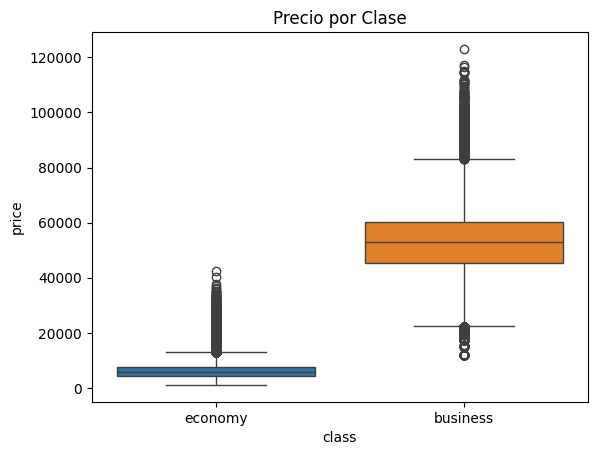

In [15]:
# Boxplot por clase
sns.boxplot(df_cleaned, x = "class", y = "price", hue = 'class')
plt.title("Precio por Clase")
plt.show()

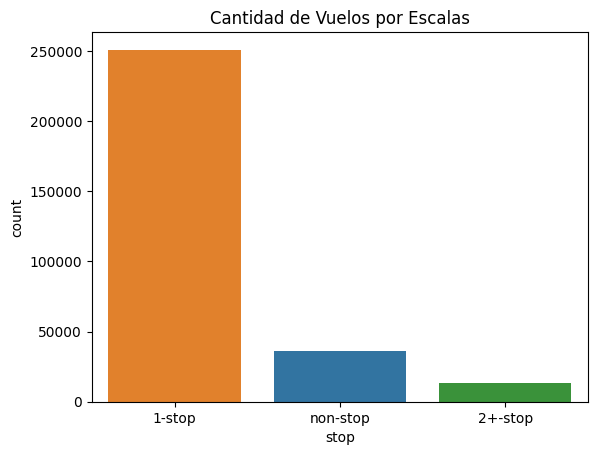

In [16]:
# Countplot por escalas
sns.countplot(df_cleaned, x = "stop", order = df_cleaned["stop"].value_counts().index, hue = 'stop')
plt.title("Cantidad de Vuelos por Escalas")
plt.show()

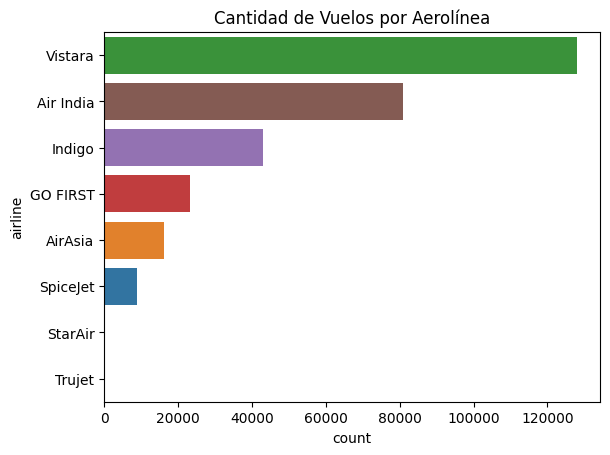

In [17]:
# Countplot por aerolínea
sns.countplot(df_cleaned, y = "airline", order = df_cleaned["airline"].value_counts().index, hue = 'airline')
plt.title("Cantidad de Vuelos por Aerolínea")
plt.show()

📊 **Análisis Exploratorio de Datos (EDA)**

**1. Univariado:**

🔹 **Distribución de precios:**
- Hay una gran concentración de precios bajos (clase económica).
- Los precios se dispersan bastante en clase ejecutiva.

**2. Bivariado:**

🔹 **Cantidad de vuelos por escalas (`stop`):**
- La mayoría de los vuelos son non-stop.
- Los vuelos con 1-stop también son comunes, pero los de 2+-stop son pocos.

🔹 **Precio por clase (`class`):**
- Los precios en clase ejecutiva son mucho más altos y con mayor variabilidad.
- Clase económica tiene precios bastante agrupados.

🔹 **Cantidad de vuelos por aerolínea:**
- Las aerolíneas con más vuelos son Air India, IndiGo, Vistara y SpiceJet.

#### <strong><font color="green">4.	Análisis de correlaciones entre las diferentes variables.</font></strong>

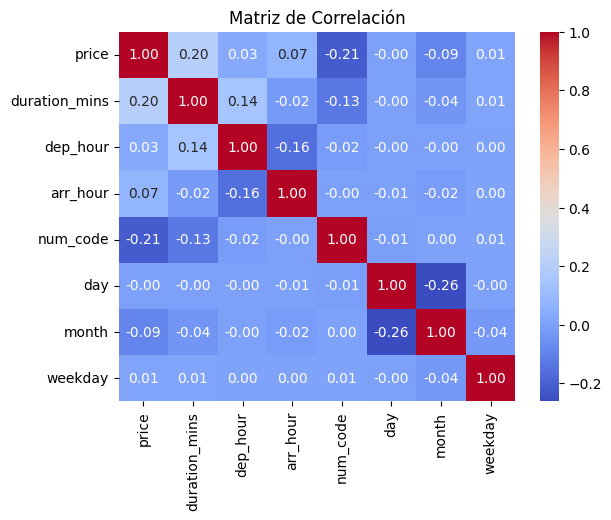

In [18]:
# Se definen variables para análisis de correlación
correlation_df = df_cleaned[["price", "duration_mins", "dep_hour", "arr_hour", "num_code", "day", "month", "weekday"]]

# Correlación entre variables
correlation_matrix = correlation_df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Matriz de Correlación')
plt.show()

<Axes: >

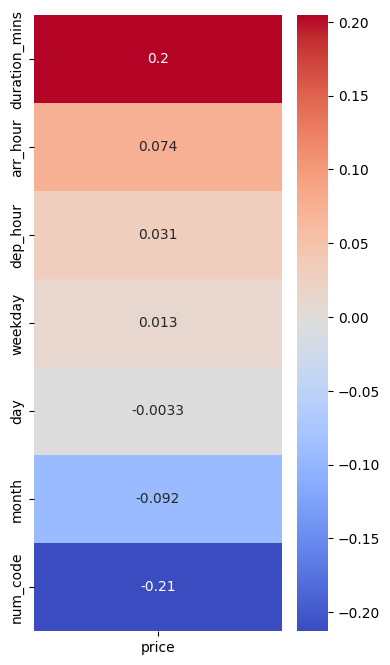

In [19]:
# Gráfico de valores de correlación respecto a "price"
plt.rcParams.update({'font.size': 10})
plt.figure(figsize = (4, 8))
sns.heatmap(correlation_matrix.loc[:, ['price']].sort_values('price', ascending = False).iloc[1:], cmap = 'coolwarm', annot = True)

🔍 **Análisis de Correlaciones**

🔹 **`price` tiene correlaciones moderadas con:**
- `duration_mins`: A mayor duración del vuelo, tiende a ser más costoso (probablemente por escalas).
- `num_code`: Relación algo indirecta; puede estar correlacionado con la aerolínea o tipo de vuelo.
- `arr_hour` y `dep_hour`: correlaciones muy bajas, pero útiles para ingeniería de variables.
- Variables temporales (`day`, `month`, `weekday`) tienen muy poca correlación directa, pero podrían ayudar como factores estacionales en ciertos modelos.

✅ **Variables más relevantes para el modelo:**
- `duration_mins`
- `stop` (no está en esta matriz pero es clave)
- `class` (económica o ejecutiva)
- `airline`
- `dep_hour`, `arr_hour`

#### <strong><font color="green">5.	Transformaciones necesarias para realizar el modelamiento y creación de variables.</font></strong>

In [ ]:
# Copiar DF para transformar datos
df_processed = df_cleaned.copy()

In [ ]:
# Mapear escalas a valores numéricos
df_processed["stop"] = df_processed["stop"].map({"non-stop": 0, "1-stop": 1, "2+-stop": 2})

In [ ]:
# Codificar variables categóricas
label_cols = ["airline", "ch_code", "class"]
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

In [ ]:
# Crear variable categórica "vuelo nocturno"
df_processed["is_night_flight"] = df_processed["dep_hour"].apply(lambda x: 1 if (x >= 21 or x < 6) else 0)

In [ ]:
# Eliminar columnas irrelevantes
cols_to_drop = ["date", "from", "to", "dep_time", "arr_time", "time_taken"]
df_processed.drop(columns = cols_to_drop, inplace = True)

In [ ]:
# Imprimir dataset procesado
df_processed

,airline,ch_code,num_code,stop,price,class,duration_mins,dep_hour,arr_hour,day,month,weekday,is_night_flight
0,4,6,8709,0,5953,1,130,18,21,11,2,4,0
1,4,6,8157,0,5953,1,140,6,8,11,2,4,0
2,1,4,764,0,5956,1,130,4,6,11,2,4,1
3,7,7,995,0,5955,1,135,10,12,11,2,4,0
4,7,7,963,0,5955,1,140,8,11,11,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,7,7,822,1,69265,0,605,9,19,31,3,3,0
300257,7,7,826,1,77105,0,625,12,22,31,3,3,0
300258,7,7,832,1,79099,0,830,7,20,31,3,3,0
300259,7,7,828,1,81585,0,600,7,17,31,3,3,0


In [ ]:
# Análisis calidad de datos procesados
analysis_result3 = f.data_quality_analysis(df_processed).set_index('Columna')
print(analysis_result3.sort_values('Tipo de dato'))

                Tipo de dato  Valores únicos  Valores nulos  % nulos
Columna                                                             
airline                int32               8              0      0.0
ch_code                int32               8              0      0.0
price                  int32           12165              0      0.0
class                  int32               2              0      0.0
dep_hour               int32              24              0      0.0
arr_hour               int32              24              0      0.0
day                    int32              31              0      0.0
month                  int32               2              0      0.0
weekday                int32               7              0      0.0
num_code               int64            1255              0      0.0
stop                   int64               3              0      0.0
duration_mins          int64             477              0      0.0
is_night_flight        int64      

✅ **Transformaciones aplicadas:**
- Codificación de variables categóricas: `airline`, `class`, `ch_code`.
- Limpieza de `stop` → convertida a escala ordinal (0, 1, 2).
- Duración del vuelo (`duration_mins`) como número.
- Extraído `dep_hour`, `arr_hour`, `day`, `month`, `weekday`.
- Variable nueva: `is_night_flight` (booleano).
- Eliminadas columnas redundantes o irrelevantes para modelado.

#### <strong><font color="green">6.	Elección de 3 modelos candidatos para resolver el problema.</font></strong>

In [29]:
# Variables predictoras (X) y variable objetivo (y)
X = df_processed.drop("price", axis = 1)
y = df_processed["price"]

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Modelos base
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state = 42),
    "XGBoost": XGBRegressor(random_state = 42, verbosity = 0)
}

#### <strong><font color="green">7.	Elección de grilla de hiperparámetros y optimización de modelos.</font></strong>

In [30]:
# Grid para Random Forest
rf_params = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20, None]
}

In [31]:
# Grid para XGBoost
xgb_params = {
    "n_estimators": [50, 100],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.05, 0.1]
}

In [32]:
# GridSearch para Random Forest
rf_grid = GridSearchCV(RandomForestRegressor(random_state = 42), rf_params, cv = 3, scoring = "neg_root_mean_squared_error", n_jobs = -1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [50, 100]},
             scoring='neg_root_mean_squared_error')

In [33]:
# GridSearch para XGBoost
xgb_grid = GridSearchCV(XGBRegressor(random_state = 42, verbosity = 0), xgb_params, cv = 3, scoring = "neg_root_mean_squared_error", n_jobs = -1)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 6, 10],
                         'n_estimators': [50, 100]},
             scoring='neg_root_mean_squared_error')

In [34]:
# Modelos finales optimizados
best_rf = rf_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

#### <strong><font color="green">8.	Definición de métricas para evaluar los modelos entrenados y generación de gráficos de comparación.</font></strong>

In [35]:
# Función para evaluación
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "RMSE": mean_squared_error(y_test, y_pred, squared = False),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

In [36]:
# Evaluar todos los modelos
results = {
    "Linear Regression": evaluate_model("LR", models["Linear Regression"].fit(X_train, y_train), X_test, y_test),
    "Random Forest": evaluate_model("RF", best_rf, X_test, y_test),
    "XGBoost": evaluate_model("XGB", best_xgb, X_test, y_test)
}

In [37]:
# Mostrar métricas
results_df = pd.DataFrame(results).T
print(results_df)

                          RMSE          MAE  R2 Score
Linear Regression  6955.777309  4525.344988  0.905966
Random Forest      2676.081055  1161.705984  0.986082
XGBoost            2935.805898  1637.254563  0.983249


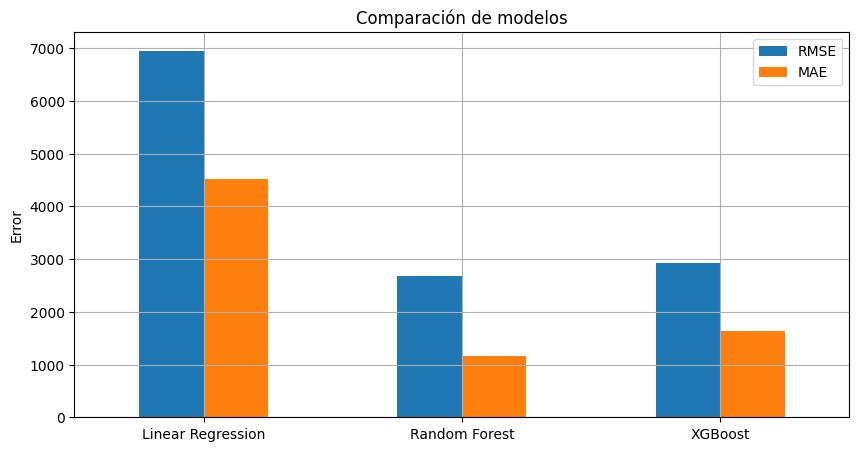

In [38]:
# Gráfico comparativo
results_df[["RMSE", "MAE"]].plot(kind = "bar", figsize = (10, 5))
plt.title("Comparación de modelos")
plt.ylabel("Error")
plt.xticks(rotation = 0)
plt.grid(True)
plt.show()

🔍 **Evaluación de modelos**

Los tres modelos evaluados muestran un buen desempeño, pero existen diferencias claras en cuanto a precisión y error de predicción:

| Modelo               | RMSE    | MAE     | R² Score |
|----------------------|---------|---------|----------|
| Linear Regression    | 6955.77 | 4525.34 | 0.906    |
| Random Forest        | 2676.08 | 1161.71 | 0.986    |
| XGBoost             | 2935.89 | 1637.25 | 0.983    |

✅ **Conclusiones**
- Random Forest obtuvo los mejores resultados en todas las métricas.
- XGBoost mostró un rendimiento muy cercano a Random Forest.
- Linear Regression tuvo el desempeño más bajo, aunque aún aceptable (R² > 0.9).

#### <strong><font color="green">9.	Conclusión ﬁnal y definición de próximos pasos para el proyecto.</font></strong>

📌 **Análisis:**

🔹 **Regresión Lineal:**
- Modelo más simple y rápido.
- Sin embargo, muestra el mayor error y la menor precisión (R² ≈ 0.91).
- Es un buen punto de partida o baseline, pero insuficiente para una solución de producción.

🔹 **Random Forest:**
- Mejor modelo general en este caso.
- Obtiene el menor RMSE y MAE, indicando predicciones más cercanas al valor real.
- Alto R² ≈ 0.986 sugiere que el modelo captura muy bien la variabilidad del precio.

🔹 **XGBoost:**
- También muestra excelente rendimiento, solo ligeramente por debajo de Random Forest.
- Puede ser más eficiente en datasets grandes y ofrece mejor control en producción gracias a sus capacidades avanzadas.

🏆 **Modelo recomendado: Random Forest**
- Por sus resultados superiores en todas las métricas clave (especialmente en MAE), **Random Forest** se posiciona como el mejor modelo para predecir el precio de boletos de avión en este caso.

🚀 **Próximos pasos sugeridos:**
- Guardar el modelo entrenado para uso en producción (con joblib o pickle).
- Implementar una API REST para hacer predicciones desde una app o sitio web.
- Agregar más variables de negocio (temporada alta, promociones, antelación de compra).
- Realizar validación cruzada más robusta o prueba en datos de producción reales.